# Transformée en Ondelettes 1D

Ce TP nécessite l'import de bibliothèques qui ne sont potentiellement pas installées par défaut sur les machines que vous utilisez. Si vous utilisez une machine personnelle il faut veiller à ce que ces bibliothèques soient bien installées.
Si vous souhaitez installer ces librairies sur votre machines, vous pouvez utiliser le fichier requirements.tex qui se trouve sur le git suivant :
https://plmlab.math.cnrs.fr/dossal/optimisationpourlimage

Si vous travaillez sur l'espace de travail créé pour vous sur https://signal-image.apps.math.cnrs.fr , les libraires sont installées.



L'objet de ce TP n'est pas de vous faire coder par vous même les différents programmes : Approximation linéaire ou non linéaire ou d'affichage des ondelettes et des fonctions d'échelle mais de vous les faire utiliser afin que vous compreniez comment ils fonctionnent. Il a aussi pour but de vous familiariser avec des bilbiothèques que vous ne connaissez sans doute pas, comme holoviews et Panel pour l'affichage et param pour la création de dashboard ne manière très rapide.
Ce TP n'est pas noté, celui sur les ondelettes 2D le sera et il vous sera essentiellement demandé de fournir des codes analogues à ceux ci en 2D.

AINSI VOTRE TRAVAIL CONSISTE ICI A LIRE ET COMPRENDRE LES CODES PROPOSÉS ET A LES TESTER.
IL FAUT QUE VOUS SOYEZ CAPABLES DE COMPRENDRE POURQUOI LES DIFFERENTS PROGRAMMES RENVOIENT CE QUILS RENVOIENT.

QUELQUES QUESTIONS SUPPLÉMENTAIRES SONT PROPOSÉES À LA FIN DU TP.



La commande de transformée en ondelettes est la suivante  pwt.wavedec (pour wavelet decimated) et peut s'utiliser comme suit :

x=pywt.wavedec(S,'db2',mod='per',level=1)

On pourra aussi utiliser la commande équivalente valable en dimension 2 également.

x=pywt.wavedecn(S,'db2',mod='per',level=1)

S est le vecteur qu'on souhaite transformer. 'db2' correspond au choix de l'ondelette. Ici il s'agit de l'ondelette associée à l'ondelette de Daubechie 4. Le 2 correspond au nombre de moments nuls de l'ondelette. L'ondelette de Haar correspond au choix db1. Le level définit le
nombre de fois où on décompose un espace $V_j$ en deux.\\
A titre d'exemple si on travaille sur un vecteur de taille 1024, on peut considérer que le vecteur que l'on transforme correspond aux 1024 coefficients de décomposition d'une fonction $f$ sur un espace $V_{-10}$. Si on effectue une transformée avec level=1 on calcule alors les coefficients de décomposition de cette fonction sur les deux sous espaces $V_{-9}$ et $W_{-9}$.  
La sortie $x$ est alors une liste de 2 vecteurs contenant les coefficients dans les bases canoniques de ces deux espaces. Si on donne la valeur 2 à level, la sortie $x$ sera une liste de 3 vecteurs contenant les coefficients dans les 3  espaces $V_{-8}$, $W_{-8}$ et $W_{-9}$.

La commande de transformée inverse est

Srec=pywt.waverec(x, 'db2')

et s'utilise comme dans le notebook.

La commande pywt.coeffs_to_array permet de concatener ces différents vecteurs en un seul.

La commande pywt.array_to_coeffs permet de transformer un unqiue tableau en une suite de tableaux qui forment une transformée en ondelettes.
Ces deux fonctions sont utilisées dans presque toutes les fonctions que je propose car je trouve plus simple de ne gérer qu'un seul tableau mais ce n'est pas une obligation. Il aurait été possible de tout faire en conservant une suite de tableau.

In [1]:
%env HV_DOC_HTML=true

env: HV_DOC_HTML=true


In [2]:
#!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00


/tmp/ipykernel_19228/3792142807.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
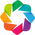

In [2]:
import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt
import pywt
import scipy.io as sio
import pandas as pd
import holoviews as hv
hv.extension('bokeh')
import param
import panel as pn
import requests
from io import BytesIO
from PIL import Image
import shutil
#pn.extension()
import boto3
import os

Chargement des données soit à partir d'un fichier local, soit à partir d'une url.

In [4]:
s3_endpoint_url = 'https://object-rook-ceph.apps.math.cnrs.fr/'
s3_access_key_id = '9F7EB8YBUWXDV7A4IZYW' # le contenu de secrets/dossal
s3_secret_access_key = 'skV01Eei5M3xVOxROIDr3qymYhWtkrxPpMyj8nwb' # le contenu de secrets/dossal
s3_bucket = 'signal-image'
s3 = boto3.client('s3',
                  '',
                  endpoint_url = s3_endpoint_url,
                  aws_access_key_id = s3_access_key_id,
                  aws_secret_access_key = s3_secret_access_key)
Data=["Blocks.npy","Piece.npy"]
if not os.path.isfile('Blocks.npy'):
    for filenames in Data:
        s3.download_file(s3_bucket,filenames,filenames)

In [5]:
def chargeData(name):
    if name=="Piece":
        res=np.load("Piece.npy")
    if name=="Blocks":
        res=np.load("Blocks.npy")

    return res
options1=dict(width=400,height=400,xaxis=None,yaxis=None,toolbar=None)
options2=dict(width=700,height=400,xaxis=None,yaxis=None,toolbar=None)
S3=chargeData("Piece")
S4=chargeData("Blocks")

Voici la manière dont on affiche une courbe grâce à Holoviews. Si vous voulez personnaliser l'affichage, je vous invite à vous reporter à l'aide. Les icônes à droite permettent de zoomler et de se déplacer dans la figure.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
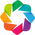

:Curve   [x]   (y)

In [6]:
hv.extension('bokeh')
hv.Curve(S3).options(**options2)

Les commandes suivantes permettent d'afficher les coefficients de décompostion du signal originale dans les espaces $V_9$ et $w_{9}$ de la transformée en ondelettes de Daubechies db2. Par défaut on utilisera le mode per (pour périodique). J'évoquerai le rôle de ce mode pendant la séance.

In [7]:
x= pywt.wavedec(S3, 'db2', mode='per', level=1)
pn.Column(hv.Curve(x[0]).options(width=700,title="Coefficients sur V-9")\
          ,hv.Curve(x[1]).options(width=700,title="Coefficients sur W-9"))

Column
    [0] HoloViews(Curve, height=300, sizing_mode='fixed', width=700)
    [1] HoloViews(Curve, height=300, sizing_mode='fixed', width=700)

Les fonctions suivantes sont le coeur du TP. Essayez de comprendre ce qu'elles renvoient.
Les deux premières qui permettent d'afficher les fonctions d'échelle et les ondelettes, utilisent le fait que la transformée en ondelettes d'une ondelette ou d'une focntion d'échelle est un Dirac. Autrement dit pour les construire on calcule la transformée en ondelettes inverse d'un Dirac.

Dans les cellules suivantes, ces codes sont utilisés, vous pourrez y voir le rôle de la variable pos.

Vous pouvez essayer d'afficher plusieurs ondelettes consécutives sur le même graphique. Comme vous pourrez le voir dans les codes d'approximation linéaire et non linéaire, holoviews utilsie le symbole * pour afficher plusieurs courbes sur la même figure.


In [8]:
def VisuFoncEchel(N,qmf,scale,pos):
    Lmax=pywt.dwt_max_level(N,pywt.Wavelet(qmf).dec_len)
    L=min(scale,Lmax)
    Ne=int(np.floor(N/2**L))
    k=int(np.floor(Ne*pos))
    temp=np.zeros(N)
    WT= pywt.wavedecn(temp, qmf, mode='per', level=L)
    arr, coeff_slices = pywt.coeffs_to_array(WT)
    temp[k]=1
    coeffs_from_arr = pywt.array_to_coeffs(temp, coeff_slices)
    Phi=pywt.waverecn(coeffs_from_arr,qmf,mode='per')
    return hv.Curve(Phi).options(width=600)
def VisuOnd(N,qmf,scale,pos):
    Lmax=pywt.dwt_max_level(N,pywt.Wavelet(qmf).dec_len)
    L=min(scale,Lmax)
    Ne=int(np.floor(N/2**L))
    k=int(np.floor(Ne*pos))
    temp=np.zeros(N)
    WT= pywt.wavedecn(temp, qmf, mode='per', level=L)
    arr, coeff_slices = pywt.coeffs_to_array(WT)
    temp[k+Ne]=1
    coeffs_from_arr = pywt.array_to_coeffs(temp, coeff_slices)
    Phi=pywt.waverecn(coeffs_from_arr,qmf,mode='per')
    return pn.Row(hv.Curve(Phi).options(width=600))
def ApproxLin(S,qmf,scale):
    # Approximation linéaire dans une base d'ondelettes. l'ondelette est spécifiée par la str qmf
    # L'approximation est une projection sur l'espace V_j de dimension 2^scale.
    N1=len(S)
    temps=np.arange(N1)
    Lmax=pywt.dwt_max_level(len(S),pywt.Wavelet(qmf).dec_len)
    WT= pywt.wavedecn(S, qmf, mode='per', level=Lmax)
    arr, coeff_slices = pywt.coeffs_to_array(WT)
    temp=np.zeros(N1)
    temp[0:2**scale]=arr[0:2**scale]
    Wtemp = pywt.array_to_coeffs(temp, coeff_slices)
    Srec=pywt.waverecn(Wtemp,qmf,mode='per')
    barres=hv.VLine(N1/2-0.5).options(color='black',line_width=1)
    LN=int(np.floor(np.log2(N1)))
    for k in np.arange(LN-Lmax,LN):
        barres=barres*hv.VLine(2**k-0.5).options(color='black',line_width=1)
    return pn.Column(hv.Curve((temps,S),kdims='temps',vdims='z')*hv.Curve(Srec).options(color='red',width=600)\
                     ,hv.Curve(arr)*hv.Curve(temp).options(color='red',width=600)*barres)
def ApproxOnd1D(S,qmf,L,T):
    Lmax=pywt.dwt_max_level(len(S),pywt.Wavelet(qmf).dec_len)
    L1=min(L,Lmax)
    WT= pywt.wavedecn(S, qmf, mode='per', level=L1)
    arr, coeff_slices = pywt.coeffs_to_array(WT)
    WTS=arr*(np.abs(arr)>T)
    coeffs_from_arr = pywt.array_to_coeffs(WTS, coeff_slices)
    Srec=pywt.waverecn(coeffs_from_arr,qmf,mode='per')
    return Srec
def ApproxOnd1Dv2(S,qmf,L,N):
    N1=len(S)
    Lmax=pywt.dwt_max_level(len(S),pywt.Wavelet(qmf).dec_len)
    L1=min(L,Lmax)
    WT= pywt.wavedecn(S, qmf, mode='per', level=L1)
    arr, coeff_slices = pywt.coeffs_to_array(WT)
    Ind=np.argsort(np.abs(arr))
    WTS=np.zeros(N1)
    WTS[Ind[N1-N:N1]]=arr[Ind[N1-N:N1]]
    coeffs_from_arr = pywt.array_to_coeffs(WTS, coeff_slices)
    Srec=pywt.waverecn(coeffs_from_arr,qmf,mode='per')
    return Srec


In [9]:
wavelist = ['haar','db2','db3','db4','coif1','coif2','coif3','sym2','sym3']

In [10]:

class VisuPhi(param.Parameterized):
    wave = param.ObjectSelector(default="haar",objects=wavelist)
    scale = param.Integer(12,bounds=(0,15))
    pos = param.Number(0.5,bounds=(0,0.95))
    #T = param.Number(1,bounds=(1,100))
    #@param.depends('wave', 'T', 'L')
    def view(self):
        N=2**15
        Affich=VisuFoncEchel(N,self.wave,self.scale,self.pos)
        return Affich

In [11]:
Visuphi = VisuPhi()
pn.Row(Visuphi.param,Visuphi.view)

Row
    [0] Column(margin=(5, 10), name='VisuPhi')
        [0] StaticText(value='<b>VisuPhi</b>')
        [1] Select(name='Wave', options=OrderedDict([('haar', ...]), value='haar')
        [2] IntSlider(end=15, name='Scale', value=12)
        [3] FloatSlider(end=0.95, name='Pos', value=0.5)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

In [12]:
class WaveApproxLin(param.Parameterized):
    wave = param.ObjectSelector(default="haar",objects=wavelist)
    scale = param.Integer(7,bounds=(0,10))
    #T = param.Number(1,bounds=(1,100))
    #@param.depends('wave', 'T', 'L')
    def view(self):
        Affich=ApproxLin(S3,self.wave,self.scale)
        return Affich

In [13]:
waveapproxlin = WaveApproxLin()
pn.Row(waveapproxlin.param,waveapproxlin.view)

Row
    [0] Column(margin=(5, 10), name='WaveApproxLin')
        [0] StaticText(value='<b>WaveApproxLin</b>')
        [1] Select(name='Wave', options=OrderedDict([('haar', ...]), value='haar')
        [2] IntSlider(end=10, name='Scale', value=7)
    [1] ParamMethod(method, _pane=Column, defer_load=False)

In [14]:
class WaveExplorer(param.Parameterized):
    wave = param.ObjectSelector(default="haar",objects=wavelist)
    L = param.Integer(9,bounds=(0,9))
    T = param.Number(0.1,bounds=(0.1,1.5))
  #  @param.depends('wave', 'T', 'L')
    def view(self):
        Srec = ApproxOnd1D(S3,self.wave,self.L,self.T)
        return hv.Curve(S3).options(color='blue',width=600)*hv.Curve(Srec).options(color='red',width=600)

In [15]:
waveexplo = WaveExplorer()
pn.Row(waveexplo.param,waveexplo.view)

Row
    [0] Column(margin=(5, 10), name='WaveExplorer')
        [0] StaticText(value='<b>WaveExplorer</b>')
        [1] Select(name='Wave', options=OrderedDict([('haar', ...]), value='haar')
        [2] IntSlider(end=9, name='L', value=9)
        [3] FloatSlider(end=1.5, name='T', start=0.1, value=0.1)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

In [16]:
class WaveExplorerv2(param.Parameterized):
    wave = param.ObjectSelector(default="haar",objects=wavelist)
    L = param.Integer(9,bounds=(0,9))
    N = param.Integer(150,bounds=(1,1023))
  #  @param.depends('wave', 'N', 'L')
    def view(self):
        Srec = ApproxOnd1Dv2(S3,self.wave,self.L,self.N)
        return hv.Curve(S3).options(color='blue',width=600)*hv.Curve(Srec).options(color='red',width=600)

In [17]:
waveexplo2 = WaveExplorerv2()
pn.Row(waveexplo2.param,waveexplo2.view)

Row
    [0] Column(margin=(5, 10), name='WaveExplorerv')
        [0] StaticText(value='<b>WaveExplorerv</b>')
        [1] Select(name='Wave', options=OrderedDict([('haar', ...]), value='haar')
        [2] IntSlider(end=9, name='L', value=9)
        [3] IntSlider(end=1023, name='N', start=1, value=150)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

1) Proposer un programme qui permet d'évaluer le nombre de moments nuls de chacune des ondelettes.
2) Modifier Waveexplorer de manière à afficher la transformée en ondelettes et afficher les coefficients du signal original en bleu, ceux conservés (au dessus du seuil) en rouge et deux lignes horizontales d'équation y=T et y=-T en noir. il faudra peut être modifier la fonction ApproxOnd1D pour qu'elle renvoie aussi les coefficients d'ondelettes.

Une manière classique de mesurer la distance d'un signal dégradé à un signal de référence est le PSNR (dont je vous laisse chercher la définition). Plus le PSNR est élevé plus la dégradation ezsts faible.

3) Proposer un  programme qui calcule et affiche le PSNR d'une approximation non linéaire en ondelettes en fonction du nombre de coefficients conservés. Cette mesure n'a d'intérêt que pour des valeurs de N où la reconstruction est correcte mais pas parfaite.

4) Quelle base d'ondelettes est la plus adaptée pour chacun des deux signaux de référence pour des valeurs de N pertinentes ?